In [1]:
from astropy.io import fits 
import pandas as pd
import matplotlib.pyplot as plt
#import smplotlib
import numpy as np
import torch 
from spender.data.sdss import BOSS
import os 
from tqdm import tqdm 
import shutil

In [7]:
data_path = "/Users/yaroslav/Documents/2. work/Research/GitHub/AGN-UMAP/data/sdss-qso-catalogue/spectra"
mini_batch_dir = '/Users/yaroslav/Documents/2. work/Research/GitHub/AGN-UMAP/data/sdss-qso-catalogue/mini-batch'

plates = []
mjds = []
fiberids = []
zs = []

#ids = ((412, 52254, 308), (412, 52250, 129))
for sub_dir in tqdm(os.listdir(data_path)): 
    if sub_dir != '.DS_Store':
        sub_batch_dir = os.path.join(mini_batch_dir, sub_dir)
        sub_dir = os.path.join(data_path, sub_dir)
        for file in os.listdir(sub_dir): 
            file_path = os.path.join(sub_dir, file)
            if len(zs)==100: 
                break 
            
            elif '.1' not in file and '.DS_' not in file:             
                with fits.open(file_path) as hdulist: 
                    z = hdulist[2].data[0]["Z"]

                if z <= 2.0:
                    zs.append(z)
                    
                    batch_file_path = os.path.join(sub_batch_dir, file)
                    
                    if not os.path.exists(sub_batch_dir): 
                        os.mkdir(sub_batch_dir)

                    shutil.copyfile(file_path, batch_file_path)
                
                    file_list = file.split('-')
                    plate = int(file_list[1])
                    plates.append(plate)
                    mjd = int(file_list[2])
                    mjds.append(mjd)
                    fiberid = int(file_list[3].split('.')[0])
                    fiberids.append(fiberid)

                    fig, axs = plt.subplots(2, 1, figsize=(6, 4))

                    with fits.open(file_path) as hdulist: 
                        axs[0].plot(10**hdulist[1].data['loglam'], hdulist[1].data['model'])
                        axs[0].set(xlabel='Observed Wavelength (A)', ylabel='Model Flux')
                        
                        axs[1].plot(10**hdulist[1].data['loglam']/(1+z), hdulist[1].data['model'])
                        axs[1].set(xlabel='Rest Wavelength (A)', ylabel='Model Flux', xlim=(1000,6000))
                    
                    fig.tight_layout()

                    plt.savefig(f'/Users/yaroslav/Documents/2. work/Research/GitHub/AGN-UMAP/code/topical/modifying-spender/post-yan/plots/hundred-test/{plate}-{mjd}-{fiberid}.png')
                    plt.clf()

ids = list((plates[i], mjds[i], fiberids[i]) for i in range(len(plates)))[0:100]

train_ids = ids[0:90]
val_ids = ids[90:]

train_zs = zs[0:90]
val_zs = zs[90:]

  1%|▏         | 1/79 [00:03<04:03,  3.12s/it]/var/folders/6p/r8cblc4s12s1_39dzt7fslfm0000gn/T/ipykernel_73548/2184995665.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(2, 1, figsize=(6, 4))
100%|██████████| 79/79 [00:13<00:00,  5.72it/s]


<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

(array([ 2.,  1.,  1.,  8., 13., 13., 16., 17., 12., 17.]),
 array([0.10932117, 0.29778966, 0.48625818, 0.67472667, 0.8631952 ,
        1.0516636 , 1.2401322 , 1.4286007 , 1.6170691 , 1.8055377 ,
        1.9940062 ], dtype=float32),
 <BarContainer object of 10 artists>)

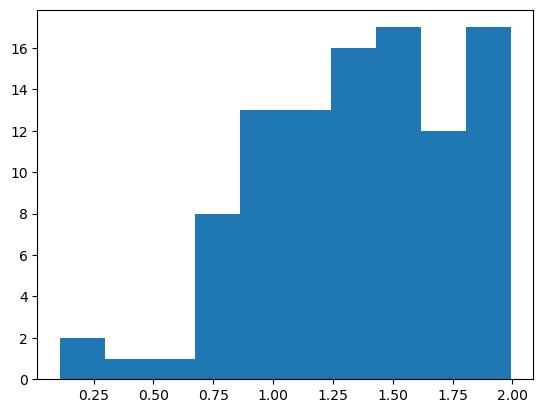

In [44]:
# make quit plots of them to check with redshift and what not. 

## Train SPENDER

In [38]:
spec, w, z, norm, zerr = BOSS.make_batch(data_path, ids)

In [36]:
z.numpy()

array([2.600671  , 2.3868454 , 3.2166388 , 2.285582  , 1.4739738 ,
       2.2102213 , 2.4212346 , 1.7627258 , 2.0063498 , 3.0198004 ,
       2.3036034 , 2.1054718 , 2.2212427 , 0.8420118 , 0.79370403,
       2.2259371 , 0.7613644 , 2.4365249 , 1.5598221 , 0.65745884,
       1.5771534 , 3.6412625 , 3.2642243 , 2.835191  , 2.3267171 ,
       2.2209609 , 2.7172894 , 2.3181744 , 2.6479778 , 2.5194888 ,
       2.3968313 , 2.2235138 , 0.9011128 , 2.2134593 , 2.6954284 ,
       3.1835506 , 1.6155224 , 2.0814269 , 2.2196114 , 3.162084  ,
       0.97577184, 2.429509  , 3.460177  , 2.3124545 , 3.3470523 ,
       0.7684055 , 3.9428318 , 0.85579836, 2.4794817 , 2.7873108 ,
       2.4445026 , 2.343721  , 3.023136  , 2.4268887 , 1.8236476 ,
       2.3498178 , 2.880894  , 2.3235931 , 2.1957548 , 1.1907785 ,
       1.5339313 , 2.4673762 , 1.7706857 , 2.903619  , 1.0122836 ,
       2.1118705 , 1.3539568 , 1.8829043 , 2.6240134 , 0.30745652,
       1.7359085 , 1.7603724 , 1.9817712 , 1.3741055 , 1.59878

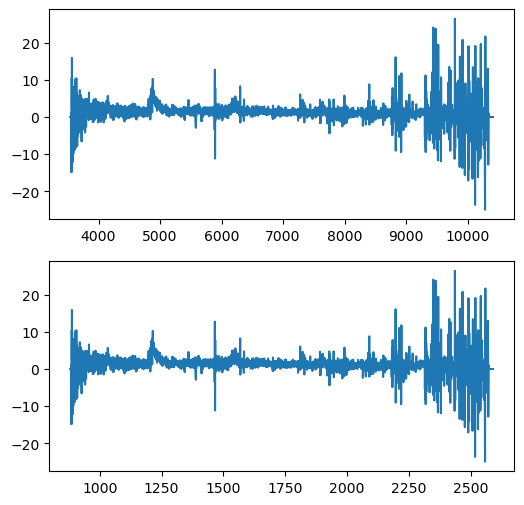

In [37]:
fig, axs = plt.subplots(2, 1, figsize=(6,6))

axs[0].plot(BOSS._wave_obs, spec[9])
axs[1].plot(BOSS._wave_obs/(1+z.numpy()[9]), spec[9])

In [ ]:
z_max = 2.0 # 0.5
    lmbda_min = instrument.wave_obs.min()/(1+z_max)
    lmbda_max = instrument.wave_obs.max()
    bins = args.superresolution * int(instrument.wave_obs.shape[0] * (1 + z_max))
    wave_rest = torch.linspace(lmbda_min, lmbda_max, bins, dtype=torch.float32)